In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import os

#print (os.listdir('/content/gdrive/My Drive/MILIZE/'))
print (os.listdir('/content/gdrive/My Drive/MILIZE/Semantic/voc2012/'))
print (os.listdir('/content/gdrive/My Drive/MILIZE/Semantic/voc2012/voc2012/'))

['train.txt', 'voc2012', 'list_15.csv', 'u_net_vgg16_voc2012.ipynb', 'list_12.csv', 'list_8.csv', 'list_19.csv', 'list_7.csv', 'data_check.ipynb', 'u_net_vgg16_voc2012_v3.ipynb', 'v2.ipynb', 'classification.ipynb']
['class', 'img']


Library

In [0]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

from PIL import Image

from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator

from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Input, Dropout, Dense, GlobalMaxPooling2D

from keras.callbacks import EarlyStopping, ReduceLROnPlateau

Data

In [0]:
path_voc = '/content/gdrive/My Drive/MILIZE/Semantic/voc2012/'
path_img = '/content/gdrive/My Drive/MILIZE/Semantic/voc2012/voc2012/img/'
path_class = '/content/gdrive/My Drive/MILIZE/Semantic/voc2012/voc2012/class/'

In [5]:
df_train = pd.read_table(path_voc+'train.txt', header=None, names=('A'))

print (df_train.shape)
df_train.head()

(1464, 1)


,A
0,2007_000032
1,2007_000039
2,2007_000063
3,2007_000068
4,2007_000121


shape:  (256, 256, 3)


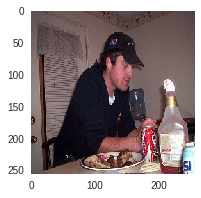

In [8]:
idx = np.random.randint(len(df_train))

file_name = df_train['A'][idx]

img_size = 256

img_pil = Image.open(path_img+file_name+'.jpg').resize((img_size, img_size))
img_np = np.array(img_pil)

print ('shape: ', img_np.shape)

plt.figure(figsize=(5, 3))
plt.imshow(img_np)
plt.grid(False)
plt.show()

mode of class_pil:  P
mode of class_pil_rgb:  RGB
(256, 3)
shape:  (256, 256)
shape:  (256, 256, 3)


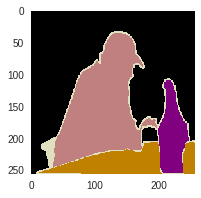

In [9]:
class_pil = Image.open(path_class+file_name+'.png').resize((img_size, img_size))
print ('mode of class_pil: ', class_pil.mode)

class_pil_rgb = class_pil.convert('RGB')
print ('mode of class_pil_rgb: ', class_pil_rgb.mode)

palette = class_pil.getpalette()
palette_np = np.array(palette).reshape(-1, 3)
print(palette_np.shape)  # (256, 3)

class_np = np.array(class_pil)
print ('shape: ', class_np.shape)

class_np_rgb = np.array(class_pil_rgb)
print ('shape: ', class_np_rgb.shape)


plt.figure(figsize=(5, 3))
plt.imshow(class_np_rgb)
plt.grid(False)
plt.show()

In [0]:
print (palette_np[:3, :])

[[  0   0   0]
 [128   0   0]
 [  0 128   0]]


Selected data

In [10]:
df_1 = pd.read_csv(path_voc+'list_12.csv')  # dog
df_2 = pd.read_csv(path_voc+'list_8.csv')  # cat
df_3 = pd.read_csv(path_voc+'list_7.csv')  # car
df_4 = pd.read_csv(path_voc+'list_19.csv')  # train

print ('shape of 1: ', df_1.shape)
print ('shape of 2: ', df_2.shape)
print ('shape of 3: ', df_3.shape)
print ('shape of 4: ', df_4.shape)

df_1.head()

shape of 1:  (121, 1)
shape of 2:  (131, 1)
shape of 3:  (128, 1)
shape of 4:  (83, 1)


,f
0,2007_000063
1,2007_000720
2,2007_001225
3,2007_001340
4,2007_001397


In [11]:
file_list_1 = df_1['f'].values
file_list_2 = df_2['f'].values
file_list_3 = df_3['f'].values
file_list_4 = df_4['f'].values

print (file_list_1.shape)
print (file_list_2.shape)
print (file_list_3.shape)
print (file_list_4.shape)

print (file_list_1[:3])

(121,)
(131,)
(128,)
(83,)
['2007_000063' '2007_000720' '2007_001225']


In [12]:
list_train_1, list_test_1 = train_test_split(file_list_1, test_size=0.3, random_state=100)
list_train_2, list_test_2 = train_test_split(file_list_2, test_size=0.3, random_state=100)
list_train_3, list_test_3 = train_test_split(file_list_3, test_size=0.3, random_state=100)
list_train_4, list_test_4 = train_test_split(file_list_4, test_size=0.3, random_state=100)

print ('shape of list_train_1: ', list_train_1.shape)
print ('shape of list_test_1: ', list_test_1.shape)
print ('shape of list_train_2: ', list_train_2.shape)
print ('shape of list_test_2: ', list_test_2.shape)
print ('shape of list_train_3: ', list_train_3.shape)
print ('shape of list_test_3: ', list_test_3.shape)
print ('shape of list_train_4: ', list_train_4.shape)
print ('shape of list_test_4: ', list_test_4.shape)

shape of list_train_1:  (84,)
shape of list_test_1:  (37,)
shape of list_train_2:  (91,)
shape of list_test_2:  (40,)
shape of list_train_3:  (89,)
shape of list_test_3:  (39,)
shape of list_train_4:  (58,)
shape of list_test_4:  (25,)


In [0]:
#list_train = np.concatenate((list_train_1, list_train_2, list_train_3, list_train_4), axis=0)
#list_test = np.concatenate((list_test_1, list_test_2, list_test_3, list_test_4), axis=0)
#list_train = np.concatenate((list_train_1, list_train_2), axis=0)
#list_test = np.concatenate((list_test_1, list_test_2), axis=0)
#list_train = np.concatenate((list_train_1, list_train_4), axis=0)
#list_test = np.concatenate((list_test_1, list_test_4), axis=0)

#print ('shape of list_train: ', list_train.shape)
#print ('shape of list_test: ', list_test.shape)

In [0]:
df_1 = pd.DataFrame({
    'filename': list_train_1,
    'category': 1
})

df_2 = pd.DataFrame({
    'filename': list_train_2,
    'category': 0
})

In [0]:
df_1['filename'] = df_1['filename'].apply(lambda x: x+'.jpg')
df_2['filename'] = df_2['filename'].apply(lambda x: x+'.jpg')

In [0]:
#df_1.head()
#df_2.head()

In [139]:
df = pd.concat((df_1, df_2), axis=0)

print (df.shape)
print (df.info())
df.head()

(175, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 90
Data columns (total 2 columns):
category    175 non-null int64
filename    175 non-null object
dtypes: int64(1), object(1)
memory usage: 4.1+ KB
None


,category,filename
0,1,2011_002300.jpg
1,1,2008_000336.jpg
2,1,2009_001828.jpg
3,1,2007_002055.jpg
4,1,2007_001340.jpg


In [0]:
train_df, validate_df = train_test_split(df, test_size=0.20, stratify= df['category'], 
                                         random_state=100)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

total_train = len(train_df)
total_validate = len(validate_df)

In [108]:
print (train_df.shape)
print (validate_df.shape)
print (train_df['category'].value_counts())

#train_df.head(10)

(140, 2)
(35, 2)
0    73
1    67
Name: category, dtype: int64


generator

In [0]:
img_size = 256
batch_size = 32

In [134]:
train_datagen = ImageDataGenerator(
    #rotation_range=15,
    rescale=1./255,
    #shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    #width_shift_range=0.1,
    #height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    path_img, 
    x_col='filename',
    y_col='category',
    target_size=(img_size, img_size),
    class_mode='binary',
    batch_size=batch_size,
    classes=[0, 1]
)

Found 139 images belonging to 2 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image.py:2059: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.df[x_col] = self.df[x_col].astype(str)


In [113]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    path_img, 
    x_col='filename',
    y_col='category',
    target_size=(img_size, img_size),
    class_mode='binary',
    batch_size=batch_size,
    classes=[0, 1]
)

Found 35 images belonging to 2 classes.


In [114]:
print (train_generator.class_indices)
print (validation_generator.class_indices)

{0: 0, 1: 1}
{0: 0, 1: 1}


In [135]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    path_img, 
    x_col='filename',
    y_col='category',
    target_size=(img_size, img_size),
    class_mode='binary'
)

Found 1 images belonging to 1 classes.


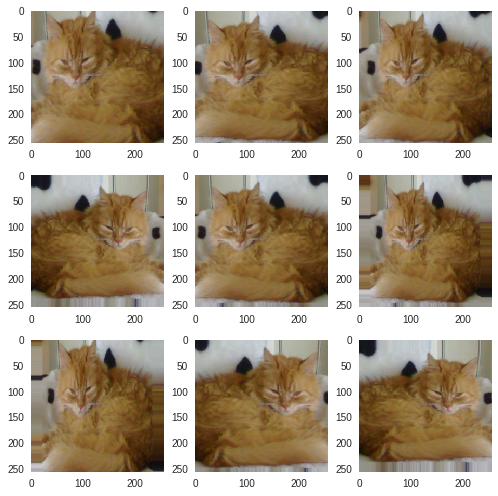

In [136]:
plt.figure(figsize=(7, 7))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        plt.grid(False)
        break
plt.tight_layout()
plt.show()

In [0]:
# dog: 12 -> 1, [0, 0, 255]  blue
# cat: 8 -> 2, [255, 0, 0] red
# car: 7 -> 3, [0, 255, 0] green
# train: 19 -> 4, [255, 255, 0]  yellow

Model

In [0]:
img_width = img_size
img_height = img_size

input_tensor = Input(shape=(img_width, img_height, 3))
    
vgg_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)

In [76]:
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [0]:
#vgg_top = vgg_model.get_layer('block5_pool')
vgg_top = vgg_model.get_layer('block5_conv2')
last_output = vgg_top.output

#for layer in vgg_model.layers[:15]:
#    layer.trainable = False
#for layer in vgg_model.layers[15:]:
#    layer.trainable = True
    
for layer in vgg_model.layers:
    layer.trainable = False       

In [0]:
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = Dense(1, activation='sigmoid')(x)

model = Model(vgg_model.input, x)

In [82]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [0]:
early_stopping = EarlyStopping(monitor='val_acc', patience=5, mode='max', 
                              verbose=1)

lr_reduction = ReduceLROnPlateau(monitor='val_acc', patience=5, 
                                 factor=0.5, min_lr=0.00001, verbose=1)

callbacks = [early_stopping, lr_reduction]

In [133]:
epochs = 10

history = model.fit_generator(
    train_generator,
    steps_per_epoch=total_train//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    callbacks=callbacks,
    verbose=1)

Epoch 1/10
4/4 [==============================] - 3s 771ms/step - loss: 0.5575 - acc: 0.7326 - val_loss: 0.5308 - val_acc: 0.6875
Epoch 2/10
4/4 [==============================] - 3s 776ms/step - loss: 0.5456 - acc: 0.7266 - val_loss: 1.5313 - val_acc: 0.0000e+00
Epoch 3/10
4/4 [==============================] - 3s 759ms/step - loss: 0.3979 - acc: 0.7856 - val_loss: 0.6033 - val_acc: 0.6250
Epoch 4/10
4/4 [==============================] - 3s 644ms/step - loss: 0.3977 - acc: 0.8381 - val_loss: 0.8969 - val_acc: 0.3333
Epoch 5/10
4/4 [==============================] - 3s 771ms/step - loss: 0.4581 - acc: 0.8094 - val_loss: 0.6140 - val_acc: 0.6562
Epoch 6/10
4/4 [==============================] - 2s 619ms/step - loss: 0.5446 - acc: 0.7087 - val_loss: 0.7006 - val_acc: 0.3333

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 00006: early stopping


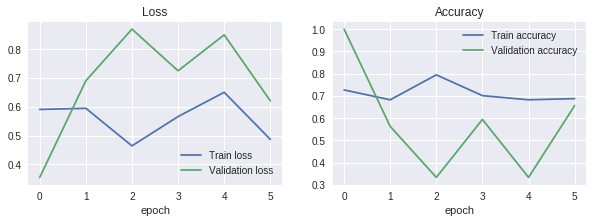

In [132]:
fig, (ax_loss, ax_acc) = plt.subplots(1, 2, figsize=(10, 3))
ax_loss.plot(history.epoch, history.history["loss"], label="Train loss")
ax_loss.plot(history.epoch, history.history["val_loss"], label="Validation loss")
ax_loss.set_title('Loss')
ax_loss.set_xlabel('epoch')
ax_loss.legend(loc='best')

ax_acc.plot(history.epoch, history.history["acc"], label="Train accuracy")
ax_acc.plot(history.epoch, history.history["val_acc"], label="Validation accuracy")
ax_acc.set_title('Accuracy')
ax_acc.set_xlabel('epoch')
ax_acc.legend(loc='best')
plt.show()

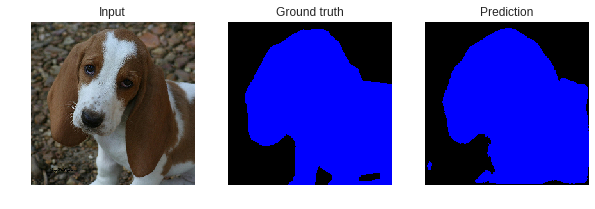


% of common:  95.3125

Ground truth
% of 0:  38.48114013671875
% of 1:  61.51885986328125
% of 2:  0.0
% of 3:  0.0
% of 4:  0.0

Prediction
% of 0:  38.08441162109375
% of 1:  61.91558837890625
% of 2:  0.0
% of 3:  0.0
% of 4:  0.0


In [0]:
idx = np.random.randint(len(x))

fig = plt.figure(figsize = (10, 3))
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(x[idx])
ax1.set_title('Input')
ax1.set_axis_off()

y_temp = np.argmax(y[idx], axis=-1)
y_m = np.zeros([y_temp.shape[0], y_temp.shape[1], 3]).astype(int)

for i in range(y_temp.shape[0]):
  for j in range(y_temp.shape[1]):
    if y_temp[i, j] == 0:
      y_m[i, j, :] = [0, 0, 0]
    elif y_temp[i, j] == 1:
      y_m[i, j, :] = [0, 0, 255]
    elif y_temp[i, j] == 2:
      y_m[i, j, :] = [255, 0, 0]
    elif y_temp[i, j] == 3:
      y_m[i, j, :] = [0, 255, 0]
    elif y_temp[i, j] == 4:
      y_m[i, j, :] = [255, 255, 0]
    else:
      pass

ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(y_m)
ax2.set_title('Ground truth')
ax2.set_axis_off()


y_pred_temp = np.squeeze(np.argmax(model.predict(x[idx:idx+1, :, :, :]), axis=-1))
y_pred_m = np.zeros([y_pred_temp.shape[0], y_pred_temp.shape[1], 3]).astype(int)

for i in range(y_pred_temp.shape[0]):
  for j in range(y_pred_temp.shape[1]):
    if y_pred_temp[i, j] == 0:
      y_pred_m[i, j, :] = [0, 0, 0]
    elif y_pred_temp[i, j] == 1:
      y_pred_m[i, j, :] = [0, 0, 255]
    elif y_pred_temp[i, j] == 2:
      y_pred_m[i, j, :] = [255, 0, 0]
    elif y_pred_temp[i, j] == 3:
      y_pred_m[i, j, :] = [0, 255, 0]
    elif y_pred_temp[i, j] == 4:
      y_pred_m[i, j, :] = [255, 255, 0]
    else:
      pass

ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(y_pred_m)
ax3.set_title('Prediction')
ax3.set_axis_off()

plt.show()

print ()
print ('% of common: ', np.sum((y_temp==y_pred_temp).astype(int))/img_size**2 * 100)
print ()
print ('Ground truth')
print ('% of 0: ', np.sum((y_temp==0).astype(int))/img_size**2 * 100)
print ('% of 1: ', np.sum((y_temp==1).astype(int))/img_size**2 * 100)
print ('% of 2: ', np.sum((y_temp==2).astype(int))/img_size**2 * 100)
print ('% of 3: ', np.sum((y_temp==3).astype(int))/img_size**2 * 100)
print ('% of 4: ', np.sum((y_temp==4).astype(int))/img_size**2 * 100)
print ()
print ('Prediction')
print ('% of 0: ', np.sum((y_pred_temp==0).astype(int))/img_size**2 * 100)
print ('% of 1: ', np.sum((y_pred_temp==1).astype(int))/img_size**2 * 100)
print ('% of 2: ', np.sum((y_pred_temp==2).astype(int))/img_size**2 * 100)
print ('% of 3: ', np.sum((y_pred_temp==3).astype(int))/img_size**2 * 100)
print ('% of 4: ', np.sum((y_pred_temp==4).astype(int))/img_size**2 * 100)

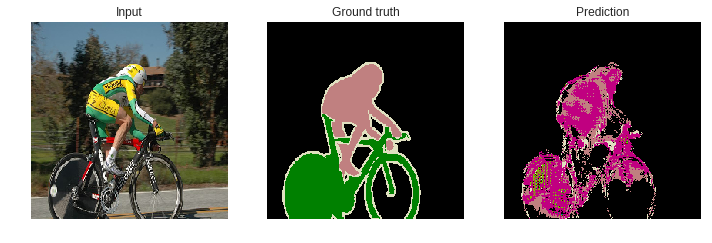

In [0]:
idx = np.random.randint(len(list_train))
file_name = list_train[idx]

#idx = np.random.randint(len(list_test))
#file_name = list_test[idx]

img_pil = Image.open(path_img+file_name+'.jpg').resize((img_size, img_size))
img_np = np.array(img_pil)

class_pil = Image.open(path_class+file_name+'.png').resize((img_size, img_size))
palette = class_pil.getpalette()
class_pil_rgb = class_pil.convert('RGB')
class_np = np.array(class_pil_rgb)

x = np.expand_dims(img_np, axis=0)
y = np.array(class_pil)

y_pred = np.copy(y)
y_pred[:, :] = np.squeeze(np.argmax(model.predict(x), axis=-1))[:, :]
y_pred = np.where(y_pred==n_classes-1, 255, y_pred)
y_img_pred = Image.fromarray(y_pred, mode='P')
y_img_pred.putpalette(palette)
y_img_pred_rgb = y_img_pred.convert('RGB')

fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(img_np)
ax1.set_title('Input')
ax1.set_axis_off()

ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(class_np)
ax2.set_title('Ground truth')
ax2.set_axis_off()

ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(y_img_pred_rgb)
ax3.set_title('Prediction')
ax3.set_axis_off()

plt.show()

In [0]:
print (y[150, 50:150])
print (y_pred[150, 50:150])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 255 255 255  13  13  13  13  13  13  13  13  13  13  13  13  13
  13  13  13  13  13  13  13  13  13  13  13  13  13  13  13  13  13  13
  13  13  13  13  13  13  13  13  13  13]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 15  0 15  0 15 15 15 15 15 15 15 15
 15 15 15 13 13 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15  0]


for checking

In [0]:
#palette = class_pil.getpalette()
#print(np.array(palette).reshape(-1, 3).shape)  # (256, 3)

#class_np_temp = np.array(class_pil)
#class_np_temp = np.where(class_np_temp==255, n_classes-1, class_np_temp)

#class_pil_temp = Image.fromarray(class_np_temp, mode='P')
#palette_2 = class_pil_temp.getpalette()
#print(np.array(palette_2).reshape(-1, 3).shape) 

In [0]:
x = np.expand_dims(img_np, axis=0)
y = np.array(class_pil)

y_pred = np.copy(y)
y_pred[:, :] = np.squeeze(np.argmax(model.predict(x), axis=-1))[:, :]
y_pred = np.where(y_pred==n_classes-1, 255, y_pred)

y_pred_2 = np.squeeze(np.argmax(model.predict(x), axis=-1))
y_pred_2 = np.where(y_pred_2==n_classes-1, 255, y_pred_2)

print (y.shape)
print (y_pred.shape)
print (y_pred_2.shape)

print (np.sum((y_pred==y_pred_2).astype(int))/256**2)

(256, 256)
(256, 256)
(256, 256)
1.0


In [0]:
#a = 120
#b = 0

#print (y[a, b:b+50])
#print (y_pred[a, b:b+50])
#print ((y==y_pred)[a, b:b+50])

print ('# of common pixels: ', np.sum((y==y_pred).astype(int)))
print ('%: ', np.sum((y==y_pred).astype(int)) / 256**2 * 100)
print ()
print ('# of 0 (truth): ', np.sum((y==0).astype(int)))
print ('%: ', np.sum((y==0).astype(int))/256**2)


# of common pixels:  50068
%:  76.397705078125

# of 0 (truth):  50701
%:  0.7736358642578125


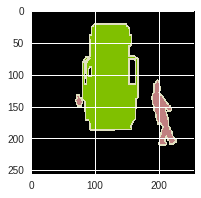

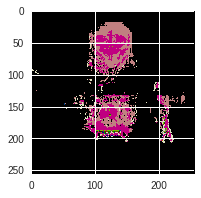

In [0]:
y_img = Image.fromarray(y, mode='P')
y_img.putpalette(palette)
y_img_rgb = y_img.convert('RGB')

plt.figure(figsize=(5, 3))
plt.imshow(np.array(y_img_rgb))
plt.show()

y_img_pred = Image.fromarray(y_pred, mode='P')
y_img_pred.putpalette(palette)
y_img_pred_rgb = y_img_pred.convert('RGB')

plt.figure(figsize=(5, 3))
plt.imshow(np.array(y_img_pred_rgb))
plt.show()

In [0]:
x, y = next(train_batches)

print (x.shape)
print (y.shape)

(32, 256, 256, 3)
(32, 256, 256, 22)


In [0]:
y_pred = model.predict(x)

print (y.shape)

(32, 256, 256, 22)


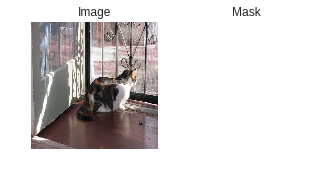

In [0]:
idx = 0

fig = plt.figure(figsize = (5, 3))
ax1 = fig.add_subplot(1, 2, 1)
ax1.imshow(x[idx])
ax1.set_title('Image')
ax1.set_axis_off()

temp = np.argmax(y[idx], axis=-1)
temp = np.where(temp==n_classes-1, 255, temp)

pil_img = Image.fromarray(temp, mode='P')
pil_img.putpalette(palette)
np_img = np.array(pil_img)

ax2 = fig.add_subplot(1, 2, 2)
ax2.imshow(np_img)
ax2.set_title('Mask')
ax2.set_axis_off()

plt.show()


In [0]:
temp.shape

(256, 256)

In [0]:
print (np.argmax(y[0,150,100:150], axis=-1))
print (np.argmax(y_pred[0,150,100:150], axis=-1))

[12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 21 21  0
  0  0]
[15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15  0  0  0  0  0  0
  0  0]


In [0]:
idx = np.random.randint(len(x_valid))

y_valid_prob = model.predict(x_valid[idx:idx+1])
y_valid_pred = (y_valid_prob > 0.5).astype(np.int)

print (y_valid_prob.shape)
#print (y_valid_pred[idx:idx+1, 100, :])
print (np.max(y_valid_pred))
print (np.min(y_valid_pred))

(1, 256, 256, 1)
1
0


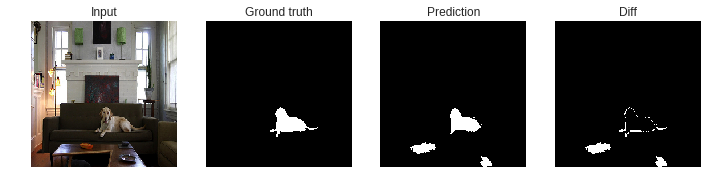

In [0]:
fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(1, 4, 1)
ax1.imshow(x_valid[idx])
ax1.set_title('Input')
ax1.set_axis_off()

ax2 = fig.add_subplot(1, 4, 2)
ax2.imshow(np.squeeze(y_valid[idx]), cmap='gray')
ax2.set_title('Ground truth')
ax2.set_axis_off()

ax3 = fig.add_subplot(1, 4, 3)
ax3.imshow(np.squeeze(y_valid_pred), cmap='gray')
ax3.set_title('Prediction')
ax3.set_axis_off()

ax4 = fig.add_subplot(1, 4, 4)
ax4.imshow(np.abs(np.squeeze(y_valid[idx])-np.squeeze(y_valid_pred)), cmap='gray')
ax4.set_title('Diff')
ax4.set_axis_off()

plt.show()

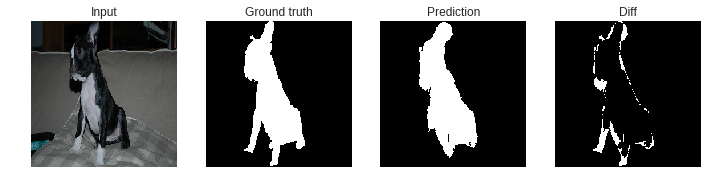

In [0]:
idx = np.random.randint(len(x_train))

y_train_prob = model.predict(x_train[idx:idx+1])
y_train_pred = (y_train_prob > 0.5).astype(np.int)

fig = plt.figure(figsize = (12, 5))
ax1 = fig.add_subplot(1, 4, 1)
ax1.imshow(x_train[idx])
ax1.set_title('Input')
ax1.set_axis_off()

ax2 = fig.add_subplot(1, 4, 2)
ax2.imshow(np.squeeze(y_train[idx]), cmap='gray')
ax2.set_title('Ground truth')
ax2.set_axis_off()

ax3 = fig.add_subplot(1, 4, 3)
ax3.imshow(np.squeeze(y_train_pred), cmap='gray')
ax3.set_title('Prediction')
ax3.set_axis_off()

ax4 = fig.add_subplot(1, 4, 4)
ax4.imshow(np.abs(np.squeeze(y_train[idx])-np.squeeze(y_train_pred)), cmap='gray')
ax4.set_title('Diff')
ax4.set_axis_off()

plt.show()

Index color

In [0]:
def cast_to_pil(ndarray, palette, index_void=None):
        assert len(ndarray.shape) == 3
        res = np.argmax(ndarray, axis=2)
        if index_void is not None:
            res = np.where(res == index_void, 0, res)
        image = Image.fromarray(np.uint8(res), mode="P")
        image.putpalette(palette)
        return image

shape:  (256, 256, 3)


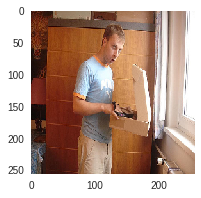

In [0]:
idx = np.random.randint(len(df_train))

file_name = df_train['A'][idx]
#file_name = '2008_003480'

size = 256

img_pil = Image.open(path_img+file_name+'.jpg').resize((size, size))
img_np = np.array(img_pil)

print ('shape: ', img_np.shape)

plt.figure(figsize=(5, 3))
plt.imshow(img_np)
plt.grid(False)
plt.show()

mode of class_pil:  P
mode of class_pil_rgb:  RGB
shape:  (256, 256)
shape:  (256, 256, 3)


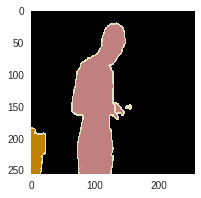

In [0]:
class_pil = Image.open(path_class+file_name+'.png').resize((size, size))
print ('mode of class_pil: ', class_pil.mode)

class_pil_rgb = class_pil.convert('RGB')
print ('mode of class_pil_rgb: ', class_pil_rgb.mode)

class_np = np.array(class_pil)
print ('shape: ', class_np.shape)

class_np_rgb = np.array(class_pil_rgb)
print ('shape: ', class_np_rgb.shape)

plt.figure(figsize=(5, 3))
plt.imshow(class_np_rgb)
plt.grid(False)
plt.show()

In [0]:
palette = class_pil.getpalette()
print (palette[:9])

palette_np = np.array(palette).reshape(-1, 3)

print(palette_np.shape)  # (256, 3)

print (palette_np[:5])

[0, 0, 0, 128, 0, 0, 0, 128, 0]
(256, 3)
[[  0   0   0]
 [128   0   0]
 [  0 128   0]
 [128 128   0]
 [  0   0 128]]


(256, 256)
P


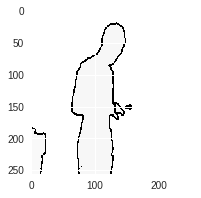

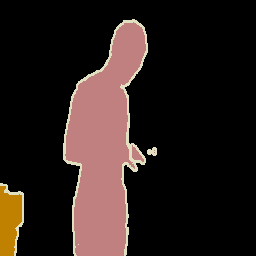

In [0]:
print (class_np.shape)

image = Image.fromarray(np.uint8(class_np), mode='P')
image.putpalette(palette)

print (image.mode)

plt.figure(figsize=(5, 3))
plt.imshow(np.array(image))
plt.show()

image

Generator

In [0]:
def batch_iter(data, labels, batch_size, shuffle=True):
    num_batches_per_epoch = int((len(data) - 1) / batch_size) + 1

    def data_generator():
        data_size = len(data)
        while True:
            # Shuffle the data at each epoch
            if shuffle:
                shuffle_indices = np.random.permutation(np.arange(data_size))
                shuffled_data = data[shuffle_indices]
                shuffled_labels = labels[shuffle_indices]
            else:
                shuffled_data = data
                shuffled_labels = labels

            for batch_num in range(num_batches_per_epoch):
                start_index = batch_num * batch_size
                end_index = min((batch_num + 1) * batch_size, data_size)
                X = shuffled_data[start_index: end_index]
                y = shuffled_labels[start_index: end_index]
                yield X, y

    return num_batches_per_epoch, data_generator()

  
train_steps, train_batches = batch_iter(x_train, y_train, batch_size)
valid_steps, valid_batches = batch_iter(x_test, y_test, batch_size)

model.fit_generator(train_batches, train_steps,
                    epochs=1, 
                    validation_data=valid_batches,
                    validation_steps=valid_steps)

In [0]:
def generator_1():
  yield 1
  yield 2
  yield 3
  
gen = generator_1()

print (type(gen))

<class 'generator'>


In [0]:
#print (next(gen))
#print (next(gen))
#print (next(gen))

for i in gen:
  print (i)

1
2
3


In [0]:
def generator_2():
  n = 0
  while True:
    yield n
    n += 1
    
gen = generator_2()

print (type(gen))

<class 'generator'>


In [0]:
for i in range(3):
  print (next(gen))

0
1
2


In [0]:
def generator_3():
  for _ in range(3):
    yield 1
    
gen = generator_3()

print (type(gen))

<class 'generator'>


In [0]:
for i in gen:
  print (i)

1
1
1


In [0]:
mat = np.identity(3)
a = [1,1,1]
b = mat[a]
c = np.argmax(b, axis=-1)

print (c)

[1 1 1]


In [0]:
!pip show tensorflow

Name: tensorflow
Version: 1.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: gast, six, keras-preprocessing, tensorboard, termcolor, grpcio, wheel, keras-applications, absl-py, astor, numpy, protobuf
Required-by: stable-baselines, magenta, fancyimpute
